In [8]:
from langchain_mistralai.chat_models import ChatMistralAI
from dotenv import load_dotenv
from pydantic_settings import BaseSettings

load_dotenv("./.env")


True

In [9]:
class MistralENV(BaseSettings):
    MISTRAL_API_KEY: str
    MODEL_NAME: str
    TEMPERATURE: float

In [10]:
class MistralChatModel(ChatMistralAI):
    def __init__(self, env: MistralENV):
        super().__init__(
            api_key=env.MISTRAL_API_KEY,
            model_name=env.MODEL_NAME,
            temperature=env.TEMPERATURE,
        )

--------State definition---------

In [12]:
from pydantic import BaseModel
from typing import List, Dict, Any

In [13]:
class AMLState(BaseModel):
    alert: Dict[str, Any]
    enrichments: Dict[str, Any]
    risk: Dict[str, Any]
    draft: Dict[str, Any]

### ===================================
# Tools / Mock Implementation
### ===================================

In [14]:
import random

In [17]:
def kyc_lookup(customer_id: str) -> Dict[str, Any]:
    # Mock implementation of KYC lookup with random Indian data

    """
    Simulates retrieving KYC information for a customer.
    In real systems, this would query the core banking / KYC database.
    """
    
    names = [
        "Amit Sharma", "Priya Singh", "Rahul Verma", "Sneha Patel", "Vikram Rao",
        "Anjali Mehta", "Rohan Gupta", "Neha Nair", "Suresh Kumar", "Pooja Joshi"
    ]
    addresses = [
        "12 MG Road, Bengaluru, Karnataka",
        "45 Nehru Street, Chennai, Tamil Nadu",
        "78 Park Lane, Mumbai, Maharashtra",
        "23 Sector 15, Noida, Uttar Pradesh",
        "56 Salt Lake, Kolkata, West Bengal",
        "34 Banjara Hills, Hyderabad, Telangana",
        "89 Civil Lines, Jaipur, Rajasthan",
        "67 Anna Nagar, Madurai, Tamil Nadu",
        "101 Vashi, Navi Mumbai, Maharashtra",
        "5 Connaught Place, New Delhi, Delhi"
    ]
    # Generate random date of birth between 1970-01-01 and 2000-12-31
    year = random.randint(1970, 2000)
    month = random.randint(1, 12)
    day = random.randint(1, 28)
    dob = f"{year:04d}-{month:02d}-{day:02d}"
    return {
        "customer_id": customer_id,
        "name": random.choice(names),
        "dob": dob,
        "address": random.choice(addresses),
        "occupation": random.choice(["Engineer", "Doctor", "Teacher", "Artist", "Scientist", "Businessman", "Lawyer", "Accountant", "Nurse", "Architect",
                                     "Politician", "Civil Servant", "Military Personnel", "Religious Leader", "Journalist", "Diplomat"]),
        "risk_flags": random.choice(["high", "low", "medium"]),
        "pep": random.choice([True, False]),
    }

In [18]:
def transaction_analyzer(customer_id: str) -> dict:
    """
    Simulates transaction analysis for suspicious patterns.
    In real systems, this would query transaction monitoring engines.
    """

    patterns =[
        "structuring_pattern",
        "rapid_movement",
        "layering_activity",
        "cash_intensive",
        "third_party_payments",
        "crypto_activity",
        "unusual_jusrisdiction"
    ]

    suspicious_pattern = random.sample(patterns, k=random.randint(0, 3))

    return {
        "customer_id": customer_id,
        "suspicious_patterns": suspicious_pattern,
        "last_6_months_txn_count": random.randint(10, 500),
        "last_6_months_txn_amount": round(random.uniform(10000, 1000000), 2),
        "average_txn_amount": round(random.uniform(100, 10000), 2),
    }

In [ ]:
def sanction_checker(entity_name: str) -> dict:
    """
    Simulates sanction list checking.
    In real systems, this would query global sanction databases.
    """

    sanction_list = {
        "Mohammed Ali": {"list": "UN Terrorist List", "confidence": 0.95},
        "Jane Doe": {"list": "EU Sanctions", "confidence": 0.85},
        "John Smith": {"list": "OFAC", "confidence": 0.90},
        "Alice Johnson": {"list": "UN Sanctions", "confidence": 0.80},
        "Sakkarai Pandian": {"list": "UN Sanctions", "confidence": 0.75},
        "Saambu": {"list": "RBI Sanctions", "confidence": 0.70},
        "Priya Singh": {"list": "EU Sanctions", "confidence": 0.82},
        "Rahul Verma": {"list": "OFAC", "confidence": 0.76},
        "Vikram Rao": {"list": "RBI Sanctions", "confidence": 0.73},
        "Neha Nair": {"list": "OFAC", "confidence": 0.81},
        "Global Trading Ltd": {"list": "UN Sanctions", "confidence": 0.88},
        "Shanghai Corp": {"list": "UN Sanctions", "confidence": 0.85},
        "Wang Enterprises": {"list": "UN Sanctions", "confidence": 0.80}
    }

In [23]:
def risk_scorer(kyc: dict, txn_analysis: dict, sanctions: dict) -> dict:
    """
    Simulates risk scoring based on KYC, transaction analysis, and sanctions data.
    In real systems, this would use complex algorithms and rules.
    """

    score = 0
    reasons = []

    # KYC based scoring
    if kyc.get("pep"):
        score += 40
        reasons.append("PEP status")
    if kyc.get("risk_flags") == "high":
        score += 30
        reasons.append("High risk flag in KYC")
    elif kyc.get("risk_flags") == "medium":
        score += 15
        reasons.append("Medium risk flag in KYC")

    # Transaction analysis based scoring
    suspicious_patterns = txn_analysis.get("suspicious_patterns", [])
    if "structuring_pattern" in suspicious_patterns:
        score += 25
        reasons.append("Structuring pattern detected")
    if "rapid_movement" in suspicious_patterns:
        score += 20
        reasons.append("Rapid movement of funds")
    if "layering_activity" in suspicious_patterns:
        score += 15
        reasons.append("Layering activity detected")
    if "cash_intensive" in suspicious_patterns:
        score += 10
        reasons.append("Cash intensive transactions")
    if "third_party_payments" in suspicious_patterns:
        score += 10
        reasons.append("Third party payments")
    if "crypto_activity" in suspicious_patterns:
        score += 20
        reasons.append("Crypto related activity")
    if "unusual_jusrisdiction" in suspicious_patterns:
        score += 15
        reasons.append("Transactions with unusual jurisdictions")

    # Sanctions based scoring
    if sanctions:
        score += 50 * sanctions.get("confidence", 0)
        reasons.append(f"Listed on {sanctions.get('list')} with confidence {sanctions.get('confidence')}")

    # Cap the score at 100
    final_score = min(score, 100)

    return {
        "risk_score": final_score,
        "risk_flags": reasons
    }

##### ==========================================
## -----------Langgraph Nodes-----------
##### ==========================================

In [26]:
from langchain_core.prompts import ChatPromptTemplate, SystemMessagePromptTemplate, HumanMessagePromptTemplate

In [24]:
def enrich_node(state: AMLState) -> AMLState:
    customer_id = state.alert.get("customer_id")
    entity_name = state.alert.get("entity_name")

    kyc = kyc_lookup(customer_id)
    txn_analysis = transaction_analyzer(customer_id)
    sanctions = sanction_checker(entity_name)

    state.enrichments = {
        "kyc": kyc,
        "transaction_analysis": txn_analysis,
        "sanctions": sanctions
    }
    return state

In [25]:
def risk_node(state: AMLState) -> AMLState:
    kyc = state.enrichments.get("kyc", {})
    txn_analysis = state.enrichments.get("transaction_analysis", {})
    sanctions = state.enrichments.get("sanctions", {})

    risk = risk_scorer(kyc, txn_analysis, sanctions)
    state.risk = risk
    return state

In [27]:
def draft_node(state:  AMLState) -> AMLState:
    prompt = ChatPromptTemplate.from_messages([
        SystemMessagePromptTemplate.from_template(
            "You are an expert AML analyst. Based on the alert details, KYC data, transaction analysis, sanctions check, and risk score, draft a concise report summarizing the findings."
        ),
        HumanMessagePromptTemplate.from_template(
            """
            Alert Details: {alert}
            KYC Data: {kyc}
            Transaction Analysis: {txn_analysis}
            Sanctions Check: {sanctions}
            Risk Score: {risk}

            Draft a report highlighting key points and recommendations.
            """
        )
    ])

    model = MistralChatModel(MistralENV())

    # LCEL: prompt | model | (lambda x: x.content)
    lcel_chain = prompt | model | (lambda x: x.content)

    response = lcel_chain.invoke({
        "alert": state.alert,
        "kyc": state.enrichments.get("kyc"),
        "txn_analysis": state.enrichments.get("transaction_analysis"),
        "sanctions": state.enrichments.get("sanctions"),
        "risk": state.risk
    })

    state.draft = {"report": response}
    return state

## Langgraph Orchestration

In [28]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(AMLState)

builder.add_node("enrich_node", enrich_node)
builder.add_node("risk_node", risk_node)
builder.add_node("draft_node", draft_node)

builder.set_entry_point("enrich_node")
builder.add_edge("enrich_node", "risk_node")
builder.add_edge("risk_node", "draft_node")
builder.add_edge("draft_node", END)

aml_graph = builder.compile()

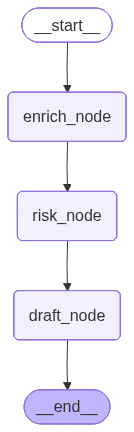

In [29]:
from IPython.display import display, Image

display(Image(aml_graph.get_graph().draw_mermaid_png()))

In [ ]:
if __name__ == "__main__":
    # Example alert
    alert = AMLState(alert={"customer_id":"1",
                            "entity_name":"Wang Enterpries"},
                    draft={},
                    enrichments={},
                    risk={}
                    )

    result = aml_graph.invoke({"alert": alert})
    print("Auto-filled draft report:")
    print(json.dumps(result["draft"], indent=2))

ValidationError: 3 validation errors for AMLState
enrichments
  Field required [type=missing, input_value={'alert': {'customer_id':...me': 'Wang Enterpries'}}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
risk
  Field required [type=missing, input_value={'alert': {'customer_id':...me': 'Wang Enterpries'}}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
draft
  Field required [type=missing, input_value={'alert': {'customer_id':...me': 'Wang Enterpries'}}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing